In [ ]:
#Write a Python code to perform the following tasks mentioned:
#Load the dataset, check its shape
#Rectify the data of the first four columns Hint:Check columns 'Temperatura Media (C)', 'Temperatura Minima (C)', 'TemperaturaMaxima (C)', and 'Precipitac’Fix the following errors present in these features
#Create new features using the 'Data' feature and the make 'Data' column as indexHint:Create a new feature 'Month' from the dates, consisting of the month of the year.Create a new feature 'Day' from the dates, consisting of the day of the week.Set values from the 'Data' column as indexes. Use code snippet:df1.set_index('Data',inplace=True)
#Handle null and duplicate values
#Check the data typeof the features and convert them to the appropriate data type
#Analyze features with outlier values
#Plot and analyze the correlation
#Split the dataset for training and testing
#Train a linear regression model and print the intercept and coefficients
#Evaluate the model using the R2 score, mean absolute error, and root mean squared error

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Consumo_cerveja.csv to Consumo_cerveja.csv


In [4]:
import pandas as pd

df = pd.read_csv("Consumo_cerveja.csv")  # Assuming the file is now in Colab's root directory

In [5]:
df.shape

(941, 7)

In [6]:
import pandas as pd

# Assuming you have already loaded your DataFrame into 'df'

# Replace commas with periods as decimal separators and convert to numeric
for column in ['Temperatura Media (C)', 'Temperatura Minima (C)', 'Temperatura Maxima (C)', 'Precipitacao (mm)']:
    df[column] = pd.to_numeric(df[column].str.replace(',', '.'), errors='coerce')

In [9]:
df['Data'] = pd.to_datetime(df['Data'], format='%Y-%m-%d')

In [10]:
import pandas as pd

# Assuming you have your DataFrame loaded as 'df'

# Convert 'Data' column to datetime objects
df['Data'] = pd.to_datetime(df['Data'], format='%Y-%m-%d')

# Create 'Month' and 'Day' features
df['Month'] = df['Data'].dt.month
df['Day'] = df['Data'].dt.dayofweek  # 0 represents Monday, 1 represents Tuesday, and so on.

# Set 'Data' as index
df.set_index('Data', inplace=True)

In [11]:
# Handling null values
df.dropna(inplace=True)  # Remove rows with any missing values

# Handling duplicate values
df.drop_duplicates(inplace=True)  # Remove duplicate rows

In [16]:
df['Temperatura Media (C)'] = df['Temperatura Media (C)'].astype(float)

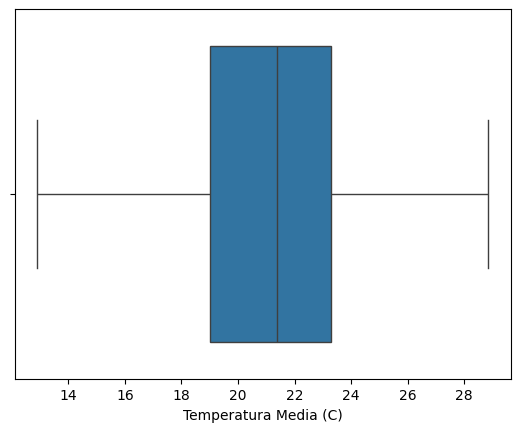

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['Temperatura Media (C)'])
plt.show()

In [21]:
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame and 'target_column' is the name of your target variable column

# Define features (X) and target (y)
X = df.drop('Consumo de cerveja (litros)', axis=1)  # Features (all columns except the target)
y = df['Consumo de cerveja (litros)']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Print the intercept and coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 5.069959770439464
Coefficients: [ 3.85221207e-02  4.55903394e-04  6.51079239e-01 -4.39344738e-02
  5.25978533e+00  1.41560182e-01 -6.92675198e-03]


In [24]:
import numpy as np

# ... (previous code)

# Calculate RMSE
mse = mean_squared_error(y_test, y_pred)  # Calculate MSE first
rmse = np.sqrt(mse)  # Then take the square root
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 2.393780538127862
